In [121]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import json
import folium
import warnings

In [122]:
# load
with open('../data/gas_station_dict.pickle', 'rb') as f:
    gas_station_dict = pickle.load(f)

In [123]:
gas_df = pd.DataFrame(gas_station_dict)

In [124]:
gas_df.tail()

,name_list,address_list,brand_list,gasolin_list,disel_list,cwsh_yn_list,lpg_yn_list,maint_yn_list,cvs_yn_list,sel24_yn_list
435,신내주유소,서울 중랑구 용마산로 705 (신내동),SK에너지,"1,759","1,619",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...
436,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),S-OIL,"1,759","1,619",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...
437,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),SK에너지,"1,789","1,658",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...
438,용마로주유소,서울 중랑구 용마산로 309 (면목동),SK에너지,"1,798","1,638",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...
439,범아주유소,서울 중랑구 동일로 881 (묵동),S-OIL,"1,849","1,689",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...


In [125]:
gas_df.head()

,name_list,address_list,brand_list,gasolin_list,disel_list,cwsh_yn_list,lpg_yn_list,maint_yn_list,cvs_yn_list,sel24_yn_list
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,"1,719","1,599",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...
1,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,"1,739","1,600",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,"1,757","1,659",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...
3,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,"1,761","1,664",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...
4,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),HD현대오일뱅크,"1,769","1,659",https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...,https://www.opinet.co.kr/images/user/gis/oil_s...


In [126]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name_list      440 non-null    object
 1   address_list   440 non-null    object
 2   brand_list     440 non-null    object
 3   gasolin_list   440 non-null    object
 4   disel_list     440 non-null    object
 5   cwsh_yn_list   440 non-null    object
 6   lpg_yn_list    440 non-null    object
 7   maint_yn_list  440 non-null    object
 8   cvs_yn_list    440 non-null    object
 9   sel24_yn_list  440 non-null    object
dtypes: object(10)
memory usage: 34.5+ KB


## 데이터 전처리

In [127]:
# col name 변경
gas_df.rename(
    columns = {'name_list' : '주유소명',
               'address_list' : '주소',
               'brand_list' : '상표',
               'gasolin_list' : '보통휘발유',
               'disel_list' : '경유',
               'cwsh_yn_list' : '세차장',
               'lpg_yn_list' : '충전소',
               'maint_yn_list' : '경정비',
               'cvs_yn_list' : '편의점',
               'sel24_yn_list' : '24시 영업'
               },
    inplace = True)


In [128]:
gasolin = gas_df['보통휘발유']

In [129]:
gas_df['보통휘발유'].replace(',', '', regex=True, inplace=True)
gas_df['경유'].replace(',', '', regex=True, inplace=True)

In [130]:
gas_df['보통휘발유'].head(), gas_df['경유'].head()

(0    1719
 1    1739
 2    1757
 3    1761
 4    1769
 Name: 보통휘발유, dtype: object,
 0    1599
 1    1600
 2    1659
 3    1664
 4    1659
 Name: 경유, dtype: object)

In [131]:
gas_df['보통휘발유'] = gas_df['보통휘발유'].astype('float')
gas_df['경유'] = gas_df['경유'].astype('float')

In [132]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주유소명    440 non-null    object 
 1   주소      440 non-null    object 
 2   상표      440 non-null    object 
 3   보통휘발유   440 non-null    float64
 4   경유      440 non-null    float64
 5   세차장     440 non-null    object 
 6   충전소     440 non-null    object 
 7   경정비     440 non-null    object 
 8   편의점     440 non-null    object 
 9   24시 영업  440 non-null    object 
dtypes: float64(2), object(8)
memory usage: 34.5+ KB


In [133]:
gas_df['세차장'][0][-7:-4]

'_01'

In [134]:
gas_df['편의점'][0][-7:-4]

'off'

In [135]:
def yes_no(href):
    last_str = href[-7:-4]
    if last_str == 'off':
        result = 'No'
    else:
        result = 'Yes'
    return result
    

In [136]:
gas_df['세차장'] = gas_df['세차장'].apply(yes_no)
gas_df['편의점'] = gas_df['편의점'].apply(yes_no)
gas_df['충전소'] = gas_df['충전소'].apply(yes_no)
gas_df['경정비'] = gas_df['경정비'].apply(yes_no)
gas_df['24시 영업'] = gas_df['24시 영업'].apply(yes_no)

In [137]:
gas_df.head()

,주유소명,주소,상표,보통휘발유,경유,세차장,충전소,경정비,편의점,24시 영업
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1719.0,1599.0,Yes,No,No,No,No
1,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,1739.0,1600.0,Yes,No,No,No,No
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,1757.0,1659.0,Yes,No,No,No,No
3,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,1761.0,1664.0,Yes,No,No,No,No
4,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),HD현대오일뱅크,1769.0,1659.0,Yes,No,Yes,No,No


In [138]:
gas_df['구'] = [address.split()[1] for address in gas_df['주소']]
gas_df.head()

,주유소명,주소,상표,보통휘발유,경유,세차장,충전소,경정비,편의점,24시 영업,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1719.0,1599.0,Yes,No,No,No,No,강남구
1,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,1739.0,1600.0,Yes,No,No,No,No,강남구
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,1757.0,1659.0,Yes,No,No,No,No,강남구
3,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,1761.0,1664.0,Yes,No,No,No,No,강남구
4,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),HD현대오일뱅크,1769.0,1659.0,Yes,No,Yes,No,No,강남구


In [167]:
gas_df['상표'].unique()

array(['SK에너지', 'HD현대오일뱅크', 'GS칼텍스', 'S-OIL', '알뜰주유소', '알뜰(ex)', '자가상표'],
      dtype=object)

In [166]:
gas_df[gas_df['상표']=='알뜰(ex)']

,주유소명,주소,상표,보통휘발유,경유,세차장,충전소,경정비,편의점,24시 영업,구
233,만남의광장주유소,서울 서초구 양재대로12길 73-71,알뜰(ex),1659.0,1569.0,No,Yes,No,Yes,Yes,서초구


In [171]:
gas_df.loc[gas_df['상표']=='알뜰(ex)', '상표'] = '알뜰주유소'
gas_df['상표'].unique()

array(['SK에너지', 'HD현대오일뱅크', 'GS칼텍스', 'S-OIL', '알뜰주유소', '자가상표'],
      dtype=object)

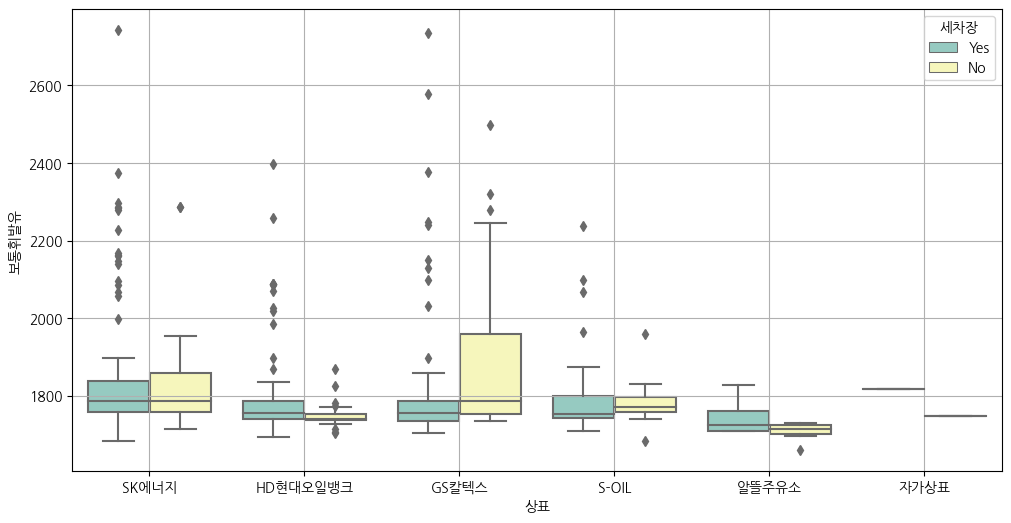

In [172]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='상표', y='보통휘발유', hue='세차장', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

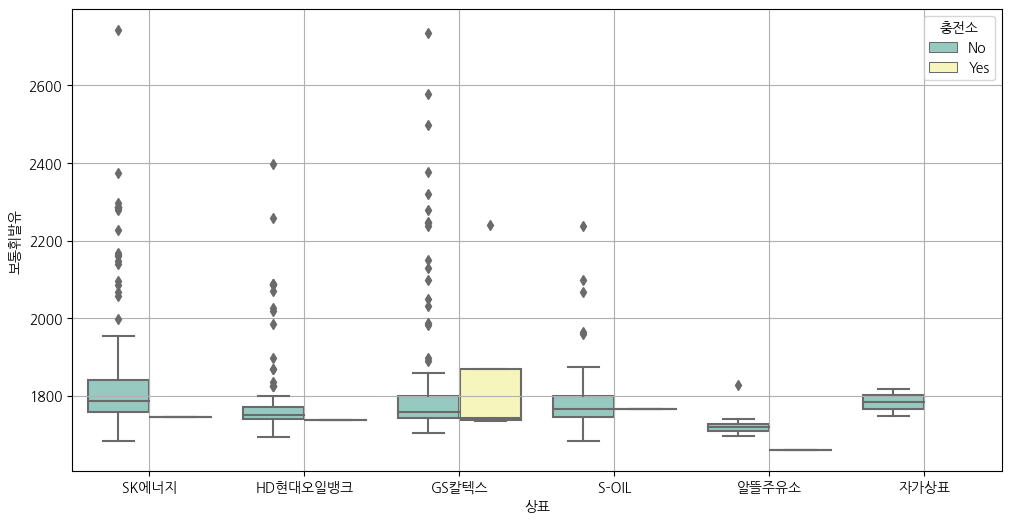

In [173]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='상표', y='보통휘발유', hue='충전소', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

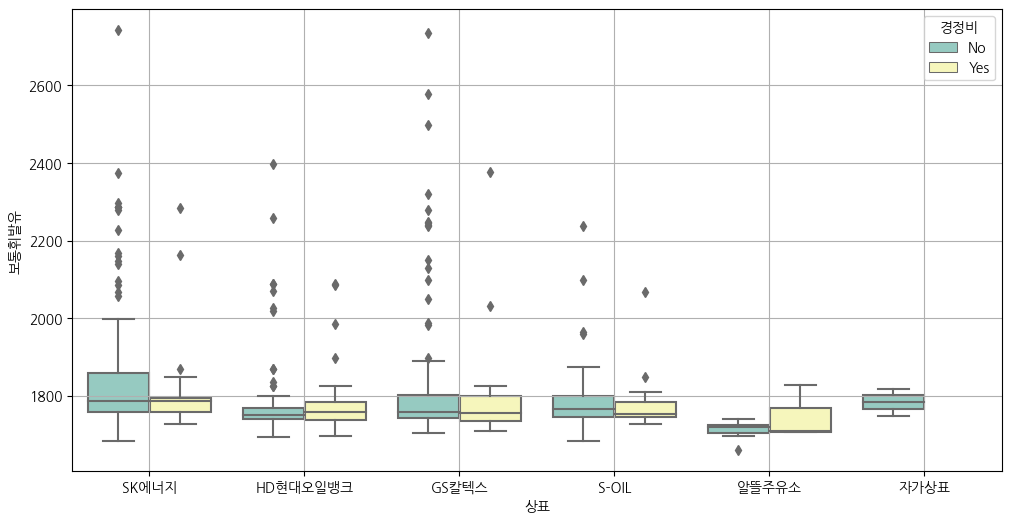

In [174]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='상표', y='보통휘발유', hue='경정비', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

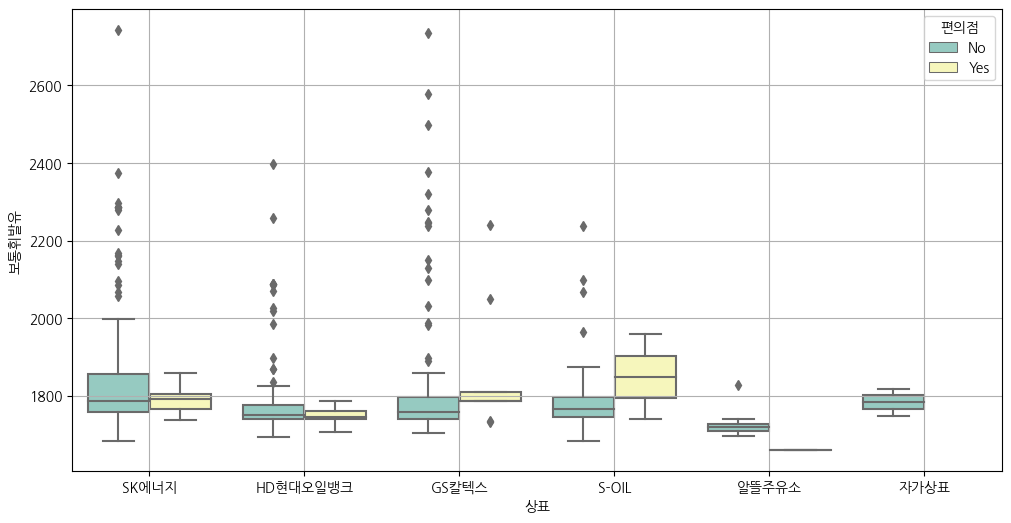

In [175]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='상표', y='보통휘발유', hue='편의점', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

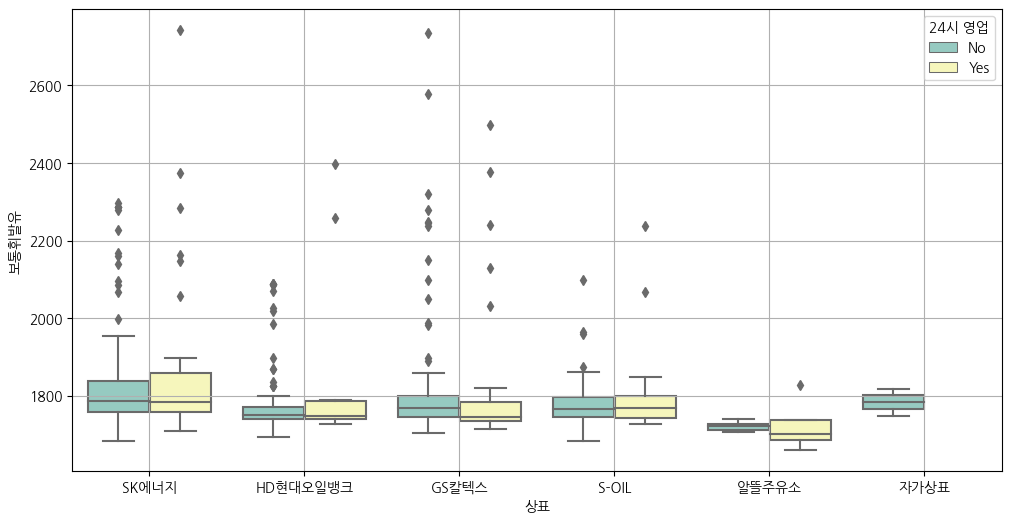

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='상표', y='보통휘발유', hue='24시 영업', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

In [177]:
# 세차장
# 충전소
# 경정비
# 편의점
# 24시 영업

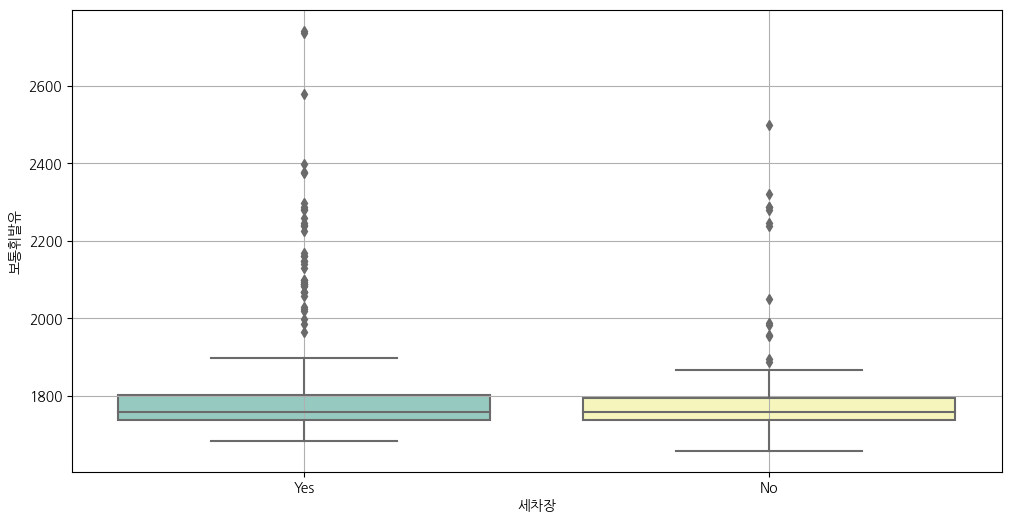

In [178]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='세차장', y='보통휘발유', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

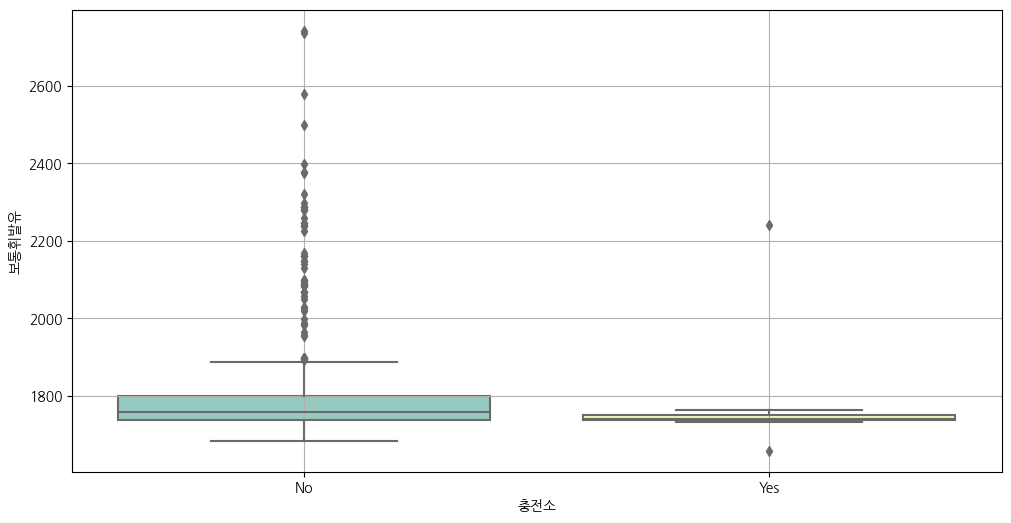

In [179]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='충전소', y='보통휘발유', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

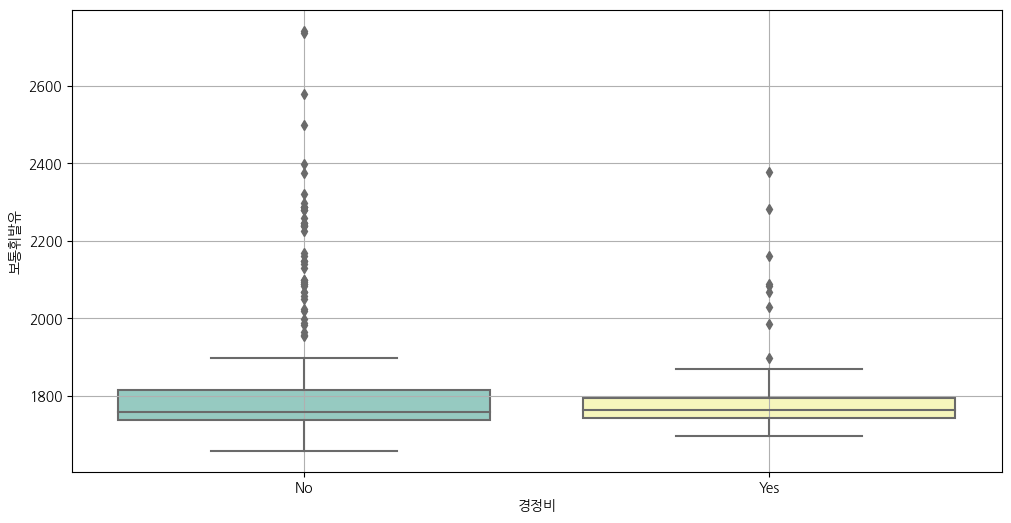

In [180]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='경정비', y='보통휘발유', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

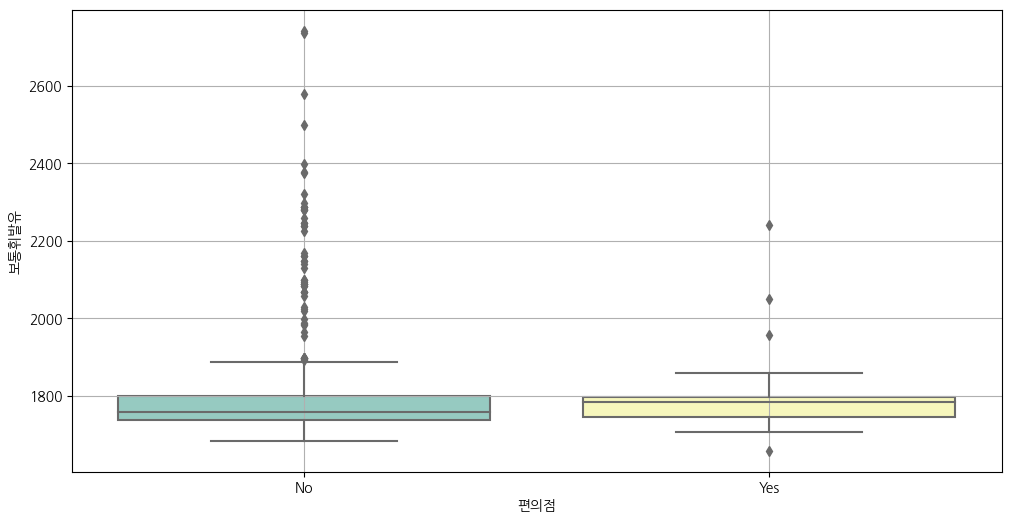

In [181]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='편의점', y='보통휘발유', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

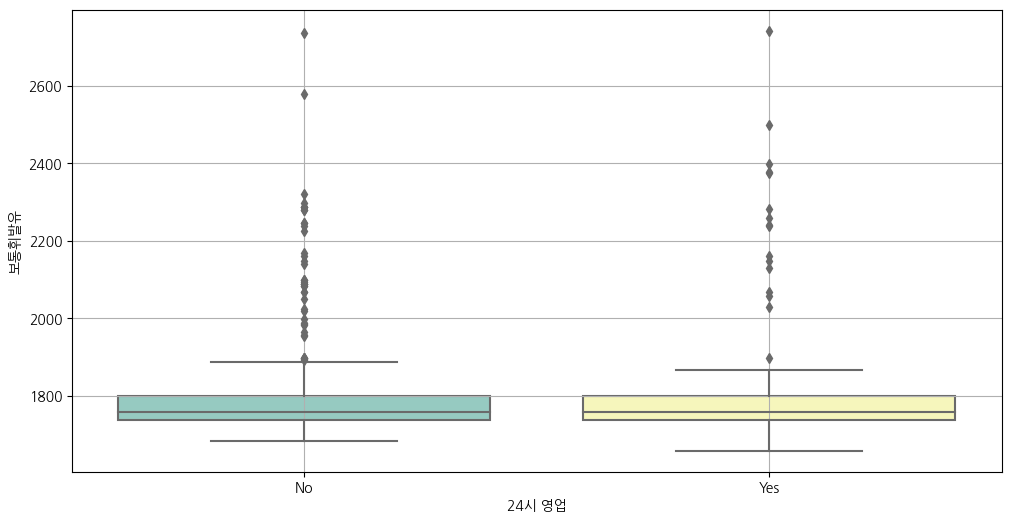

In [182]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='24시 영업', y='보통휘발유', data=gas_df, palette='Set3')
plt.grid(True)
plt.show()

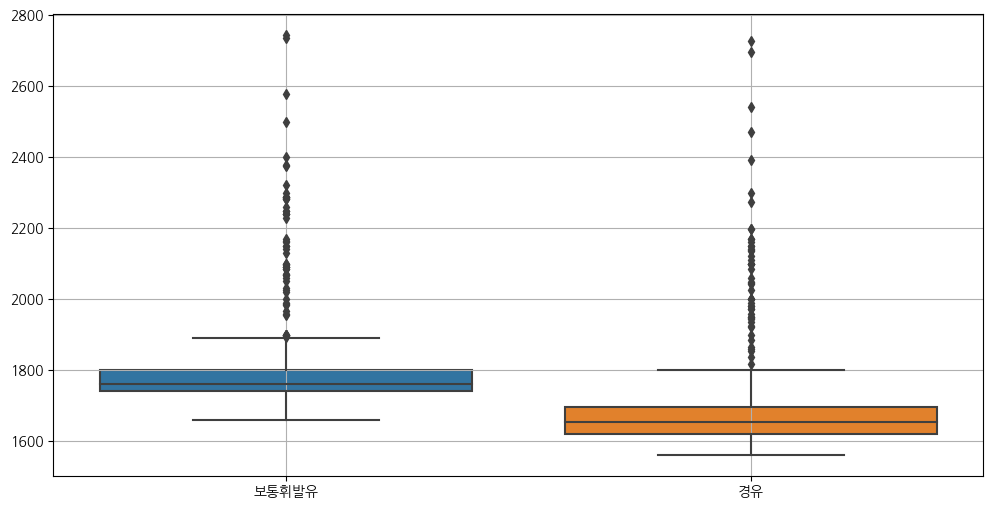

In [183]:
plt.figure(figsize=(12, 6))
sns.boxplot(gas_df)
plt.grid(True)
plt.show()

array([<Axes: title={'center': '경유'}, xlabel='[상표]'>,
       <Axes: title={'center': '보통휘발유'}, xlabel='[상표]'>], dtype=object)

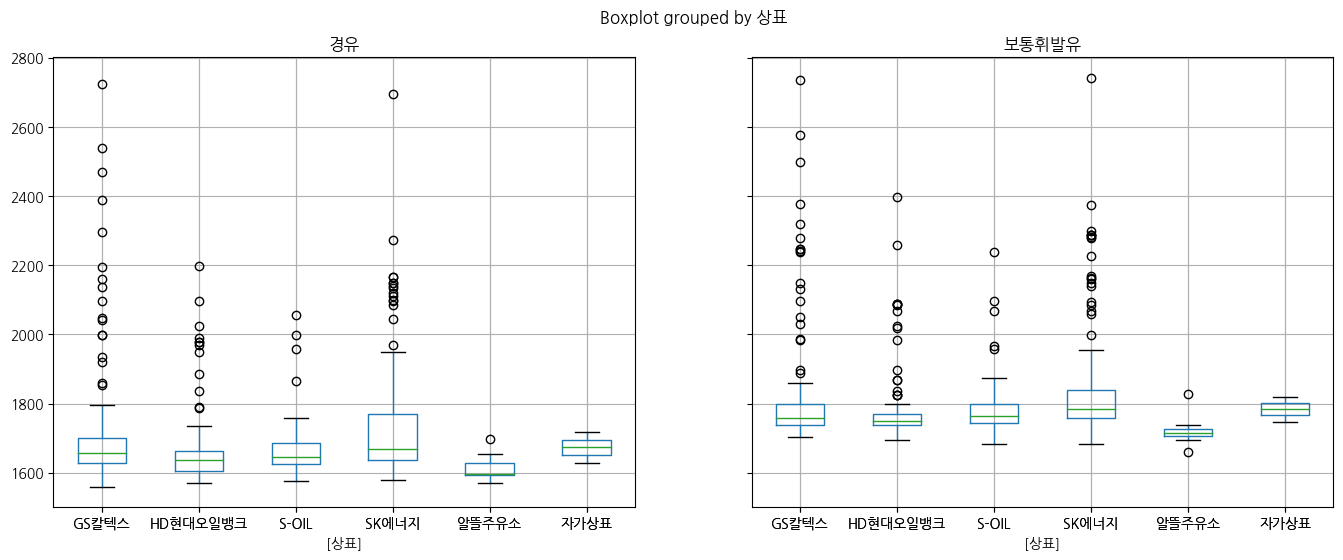

In [184]:
gas_df.boxplot(by='상표',figsize=(16, 6))